In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Exemple 1 

In [2]:
data = {'ID':[1,2,3,4,5,6],
       'Onion':[1,0,0,1,1,1],
       'Potato':[1,1,0,1,1,1],
       'Burger':[1,1,0,0,1,1],
       'Milk':[0,1,1,1,0,1],
       'Beer':[0,0,1,0,1,0]}

In [3]:
df = pd.DataFrame(data)

In [4]:
df = df[['ID', 'Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]]

In [5]:
df

,ID,Onion,Potato,Burger,Milk,Beer
0,1,1,1,1,0,0
1,2,0,1,1,1,0
2,3,0,0,0,1,1
3,4,1,1,0,1,0
4,5,1,1,1,0,1
5,6,1,1,1,1,0


In [6]:
frequent_itemsets = apriori(df[['Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]], min_support=0.50, use_colnames=True)

c:\Users\matth\Documents\GitHub\matthieu.catteyfaye\.venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [7]:
frequent_itemsets

,support,itemsets
0,0.666667,(Onion)
1,0.833333,(Potato)
2,0.666667,(Burger)
3,0.666667,(Milk)
4,0.666667,"(Onion, Potato)"
5,0.500000,"(Onion, Burger)"
6,0.666667,"(Burger, Potato)"
7,0.500000,"(Potato, Milk)"
8,0.500000,"(Onion, Potato, Burger)"


In [8]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [9]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Onion),(Potato),0.666667,0.833333,0.666667,1.00,1.200,1.0,0.111111,inf,0.500000,0.8,1.00,0.90
1,(Potato),(Onion),0.833333,0.666667,0.666667,0.80,1.200,1.0,0.111111,1.666667,1.000000,0.8,0.40,0.90
2,(Onion),(Burger),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75
3,(Burger),(Onion),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75
4,(Burger),(Potato),0.666667,0.833333,0.666667,1.00,1.200,1.0,0.111111,inf,0.500000,0.8,1.00,0.90
5,(Potato),(Burger),0.833333,0.666667,0.666667,0.80,1.200,1.0,0.111111,1.666667,1.000000,0.8,0.40,0.90
6,"(Onion, Potato)",(Burger),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75
7,"(Onion, Burger)",(Potato),0.500000,0.833333,0.500000,1.00,1.200,1.0,0.083333,inf,0.333333,0.6,1.00,0.80
8,"(Burger, Potato)",(Onion),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75
9,(Onion),"(Burger, Potato)",0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75


In [10]:
rules [ (rules['lift'] >1.125)  & (rules['confidence']> 0.8)  ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Onion),(Potato),0.666667,0.833333,0.666667,1.0,1.2,1.0,0.111111,inf,0.500000,0.8,1.0,0.9
4,(Burger),(Potato),0.666667,0.833333,0.666667,1.0,1.2,1.0,0.111111,inf,0.500000,0.8,1.0,0.9
7,"(Onion, Burger)",(Potato),0.500000,0.833333,0.500000,1.0,1.2,1.0,0.083333,inf,0.333333,0.6,1.0,0.8


Exemple 2 

In [11]:
retail_shopping_basket = {'ID':[1,2,3,4,5,6],
                         'Basket':[['Beer', 'Diaper', 'Pretzels', 'Chips', 'Aspirin'],
                                   ['Diaper', 'Beer', 'Chips', 'Lotion', 'Juice', 'BabyFood', 'Milk'],
                                   ['Soda', 'Chips', 'Milk'],
                                   ['Soup', 'Beer', 'Diaper', 'Milk', 'IceCream'],
                                   ['Soda', 'Coffee', 'Milk', 'Bread'],
                                   ['Beer', 'Chips']
                                  ]
                         }

In [12]:
retail = pd.DataFrame(retail_shopping_basket)

In [13]:
retail = retail[['ID', 'Basket']]

In [14]:
pd.options.display.max_colwidth=100

In [15]:
retail

,ID,Basket
0,1,"[Beer, Diaper, Pretzels, Chips, Aspirin]"
1,2,"[Diaper, Beer, Chips, Lotion, Juice, BabyFood, Milk]"
2,3,"[Soda, Chips, Milk]"
3,4,"[Soup, Beer, Diaper, Milk, IceCream]"
4,5,"[Soda, Coffee, Milk, Bread]"
5,6,"[Beer, Chips]"


In [16]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
retail = pd.DataFrame(mlb.fit_transform(retail.Basket), columns=mlb.classes_)

In [17]:
retail

,Aspirin,BabyFood,Beer,Bread,Chips,Coffee,Diaper,IceCream,Juice,Lotion,Milk,Pretzels,Soda,Soup
0,1,0,1,0,1,0,1,0,0,0,0,1,0,0
1,0,1,1,0,1,0,1,0,1,1,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,1,0,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,1,0,1,0
5,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [18]:
frequent_itemsets_2 = apriori(retail, use_colnames=True)

c:\Users\matth\Documents\GitHub\matthieu.catteyfaye\.venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [19]:
frequent_itemsets_2

,support,itemsets
0,0.666667,(Beer)
1,0.666667,(Chips)
2,0.500000,(Diaper)
3,0.666667,(Milk)
4,0.500000,"(Beer, Chips)"
5,0.500000,"(Beer, Diaper)"


In [20]:
association_rules(frequent_itemsets_2, metric='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Beer),(Chips),0.666667,0.666667,0.5,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.60,0.25,0.750
1,(Chips),(Beer),0.666667,0.666667,0.5,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.60,0.25,0.750
2,(Beer),(Diaper),0.666667,0.500000,0.5,0.75,1.500,1.0,0.166667,2.000000,1.000000,0.75,0.50,0.875
3,(Diaper),(Beer),0.500000,0.666667,0.5,1.00,1.500,1.0,0.166667,inf,0.666667,0.75,1.00,0.875


In [23]:
association_rules(frequent_itemsets_2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Diaper),(Beer),0.5,0.666667,0.5,1.0,1.5,1.0,0.166667,inf,0.666667,0.75,1.0,0.875


Exemple 3

In [24]:
movies = pd.read_csv('..\data\movies.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\matth\AppData\Local\Temp\ipykernel_58408\4134715920.py:1: SyntaxWarning: invalid escape sequence '\d'
  movies = pd.read_csv('..\data\movies.csv')


In [25]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [26]:
movies_ohe = movies.drop('genres', axis = 1).join(movies.genres.str.get_dummies())

In [27]:
pd.options.display.max_columns=100

In [28]:
movies_ohe.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
stat1 = movies_ohe.drop(['title', 'movieId'], axis = 1).apply(pd.value_counts)

C:\Users\matth\AppData\Local\Temp\ipykernel_58408\3350607507.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  stat1 = movies_ohe.drop(['title', 'movieId'], axis = 1).apply(pd.value_counts)


In [30]:
stat1 = stat1.transpose().drop(0,axis = 1).sort_values(by=1, ascending=False).rename(columns={1:'No. of movies'})

In [31]:
stat2 = movies.join(movies.genres.str.split('|').reset_index().genres.str.len(), rsuffix='r').rename(columns={'genresr':'genre_count'})

In [32]:
stat2 = stat2[stat2['genre_count']==1].drop('movieId', axis = 1).groupby('genres').sum().sort_values(by='genre_count', ascending=False)

In [33]:
stat = stat1.merge(stat2, how='left', left_index=True, right_index=True).fillna(0)

In [34]:
stat.genre_count=stat.genre_count.astype(int)
stat.rename(columns={'genre_count': 'No. of movies with only 1 genre'},inplace=True)

In [35]:
stat = stat.drop('title', axis = 1)
stat

,No. of movies,No. of movies with only 1 genre
Drama,4365,1170
Comedy,3315,809
Thriller,1729,74
Action,1545,39
Romance,1545,14
Adventure,1117,11
Crime,1100,11
Horror,877,183
Sci-Fi,792,17
Fantasy,654,3


Text(0.5, 1.0, 'distribution of number of genres')

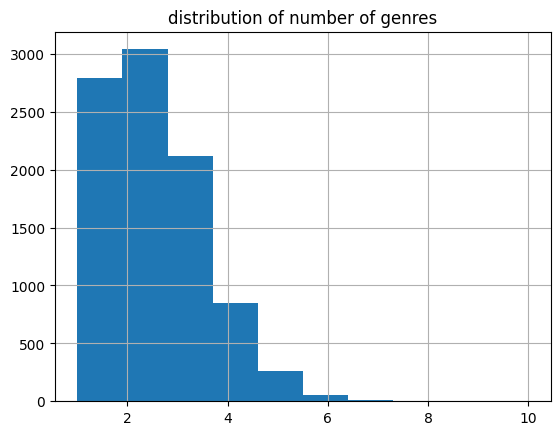

In [36]:
import matplotlib.pyplot as plt
movies_ohe.set_index(['movieId','title']).sum(axis=1).hist()
plt.title('distribution of number of genres')

In [37]:
movies_ohe.set_index(['movieId','title'],inplace=True)

In [38]:
frequent_itemsets_movies = apriori(movies_ohe,use_colnames=True, min_support=0.025)

c:\Users\matth\Documents\GitHub\matthieu.catteyfaye\.venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [39]:
frequent_itemsets_movies

,support,itemsets
0,0.169315,(Action)
1,0.122411,(Adventure)
2,0.048986,(Animation)
3,0.063890,(Children)
4,0.363288,(Comedy)
5,0.120548,(Crime)
6,0.054247,(Documentary)
7,0.478356,(Drama)
8,0.071671,(Fantasy)
9,0.096110,(Horror)


In [40]:
rules_movies =  association_rules(frequent_itemsets_movies, metric='lift', min_threshold=1.25)

In [41]:
rules_movies = rules_movies.drop(['representativity', 'zhangs_metric', 'jaccard', 'certainty', 'kulczynski'], axis = 1)
rules_movies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Adventure),(Action),0.122411,0.169315,0.058301,0.476276,2.812955,0.037575,1.586111
1,(Action),(Adventure),0.169315,0.122411,0.058301,0.344337,2.812955,0.037575,1.338475
2,(Action),(Crime),0.169315,0.120548,0.038247,0.225890,1.873860,0.017836,1.136081
3,(Crime),(Action),0.120548,0.169315,0.038247,0.317273,1.873860,0.017836,1.216716
4,(Action),(Sci-Fi),0.169315,0.086795,0.040986,0.242071,2.789015,0.026291,1.204870
5,(Sci-Fi),(Action),0.086795,0.169315,0.040986,0.472222,2.789015,0.026291,1.573929
6,(Action),(Thriller),0.169315,0.189479,0.062904,0.371521,1.960746,0.030822,1.289654
7,(Thriller),(Action),0.189479,0.169315,0.062904,0.331984,1.960746,0.030822,1.243510
8,(Adventure),(Children),0.122411,0.063890,0.029260,0.239033,3.741299,0.021439,1.230158
9,(Children),(Adventure),0.063890,0.122411,0.029260,0.457976,3.741299,0.021439,1.619096


In [42]:
rules_movies[(rules_movies.conviction>1.25)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Adventure),(Action),0.122411,0.169315,0.058301,0.476276,2.812955,0.037575,1.586111
1,(Action),(Adventure),0.169315,0.122411,0.058301,0.344337,2.812955,0.037575,1.338475
5,(Sci-Fi),(Action),0.086795,0.169315,0.040986,0.472222,2.789015,0.026291,1.573929
6,(Action),(Thriller),0.169315,0.189479,0.062904,0.371521,1.960746,0.030822,1.289654
9,(Children),(Adventure),0.063890,0.122411,0.029260,0.457976,3.741299,0.021439,1.619096
11,(Fantasy),(Adventure),0.071671,0.122411,0.030685,0.428135,3.497518,0.021912,1.534608
13,(Sci-Fi),(Adventure),0.086795,0.122411,0.027726,0.319444,2.609607,0.017101,1.289519
14,(Children),(Animation),0.063890,0.048986,0.027068,0.423671,8.648758,0.023939,1.650122
15,(Animation),(Children),0.048986,0.063890,0.027068,0.552573,8.648758,0.023939,2.092205
16,(Children),(Comedy),0.063890,0.363288,0.032877,0.514580,1.416453,0.009666,1.311672


In [43]:
rules_movies[(rules_movies.conviction>1.5)].sort_values(by=['lift','conviction'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(Animation),(Children),0.048986,0.063890,0.027068,0.552573,8.648758,0.023939,2.092205
14,(Children),(Animation),0.063890,0.048986,0.027068,0.423671,8.648758,0.023939,1.650122
9,(Children),(Adventure),0.063890,0.122411,0.029260,0.457976,3.741299,0.021439,1.619096
11,(Fantasy),(Adventure),0.071671,0.122411,0.030685,0.428135,3.497518,0.021912,1.534608
28,(Mystery),(Thriller),0.059507,0.189479,0.036055,0.605893,3.197672,0.024779,2.056601
0,(Adventure),(Action),0.122411,0.169315,0.058301,0.476276,2.812955,0.037575,1.586111
5,(Sci-Fi),(Action),0.086795,0.169315,0.040986,0.472222,2.789015,0.026291,1.573929
20,(Crime),(Thriller),0.120548,0.189479,0.057863,0.480000,2.533256,0.035022,1.558693
34,"(Crime, Drama)",(Thriller),0.067616,0.189479,0.032000,0.473258,2.497673,0.019188,1.538742
25,(War),(Drama),0.040219,0.478356,0.031014,0.771117,1.612015,0.011775,2.279087


In [44]:
pd.options.display.max_rows=50

In [45]:
movies[(movies.genres.str.contains('Adventure')) & (movies.genres.str.contains('Children')) & (~movies.genres.str.contains('Animation'))]

,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy
7,8,Tom and Huck (1995),Adventure|Children
56,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy
98,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical
114,126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy
...,...,...,...
8871,132046,Tomorrowland (2015),Action|Adventure|Children|Mystery|Sci-Fi
8916,135264,Zenon: Girl of the 21st Century (1999),Adventure|Children|Comedy
8917,135266,Zenon: The Zequel (2001),Adventure|Children|Comedy|Sci-Fi
8918,135268,Zenon: Z3 (2004),Adventure|Children|Comedy
